In [174]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from google.colab import files
from sklearn.preprocessing import StandardScaler
%matplotlib inline

uploaded = files.upload()

Saving ex1data2.txt to ex1data2.txt


## Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. You would like to expand your business to cities that may give your restaurant higher profits.\
\
The chain already has restaurants in various cities, and you have data for profits, city populations, the number of competing restaurants, and the average income of the city's population. For candidate cities, you have the city population, the number of competing restaurants, and the average income. \
\
Your goal is to use this data to predict the potential profit of opening a new restaurant in a candidate city and decide whether to expand to that city.

In [175]:
data = np.loadtxt("ex1data2.txt", delimiter=",")

x_train = data[:, :-1]
y_train = data[:, -1]

In [176]:
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [[6.1101e+00 3.0000e+00 4.5000e+04]
 [5.5277e+00 2.0000e+00 3.8000e+04]
 [8.5186e+00 5.0000e+00 5.0000e+04]
 [7.0032e+00 4.0000e+00 4.2000e+04]
 [5.8598e+00 3.0000e+00 4.0000e+04]]


In [177]:
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


In [178]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97, 3)
The shape of y_train is:  (97,)
Number of training examples (m): 97


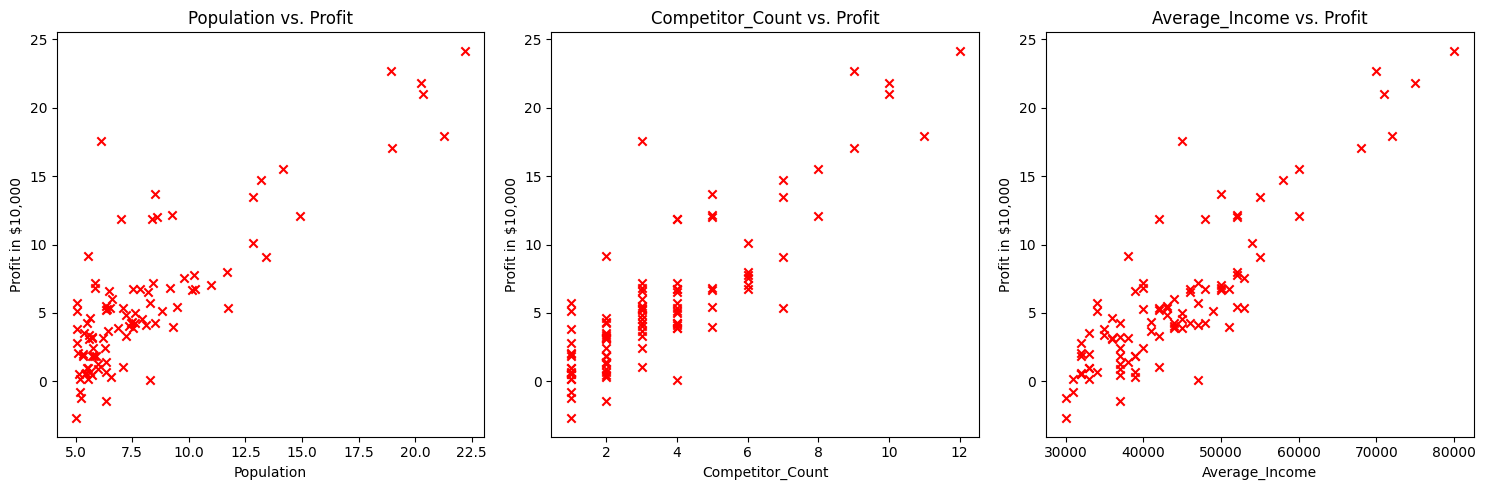

In [179]:
import matplotlib.pyplot as plt

# Assuming x_train has three columns
feature_names = ["Population", "Competitor_Count", "Average_Income"]

# Create subplots for each feature
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    axes[i].scatter(x_train[:, i], y_train, marker='x', c='r')
    axes[i].set_xlabel(feature_names[i])
    axes[i].set_ylabel("Profit in $10,000")
    axes[i].set_title(f"{feature_names[i]} vs. Profit")

plt.tight_layout()
plt.show()

In [180]:
# Normalize features
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)

**COST FUNCTION CALCULATION:-**

The equation for the cost function regularized linear regression is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{1}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{2} $$

In [181]:
def compute_cost(X, y, w, b, lambda_):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m  = X.shape[0]
    n  = len(w)
    cost = 0.
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b                                   #(n,)(n,)=scalar, see np.dot
        cost = cost + (f_wb_i - y[i])**2                               #scalar
    cost = cost / (2 * m)                                              #scalar

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar

    total_cost = cost + reg_cost                                       #scalar
    return total_cost

**GRADIENT COMPUTATION:-**\
The gradient is defined as:\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \tag{3} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{4}
\end{align*}

In [182]:
def compute_gradient_linear_reg(X, y, w, b, lambda_):

    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw

**GRADIENT DESCENT FORMULA:-**

Gradient Descent is defined as:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

In [183]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function, lambda_):

    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    l = lambda_

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b, l)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b, l))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history #return final w,b and J history for graphing

In [184]:
np.random.seed(1)
w_init = np.random.rand(x_train.shape[1])
b_init = 0.5
alpha =  0.01  # Learning rate
lambda_ = 0.1



# Run gradient descent
w_final, b_final, J_hist = gradient_descent(x_train_norm, y_train, w_init, b_init, alpha, 1900, compute_cost, compute_gradient_linear_reg, lambda_)

print(f"Optimal w: {w_final}")
print(f"Optimal b: {b_final}")

Iteration    0: Cost    23.97   
Iteration  190: Cost     4.16   
Iteration  380: Cost     3.84   
Iteration  570: Cost     3.82   
Iteration  760: Cost     3.81   
Iteration  950: Cost     3.79   
Iteration 1140: Cost     3.78   
Iteration 1330: Cost     3.77   
Iteration 1520: Cost     3.76   
Iteration 1710: Cost     3.75   
Optimal w: [0.88522971 1.41772741 2.47572079]
Optimal b: 5.839135024360679


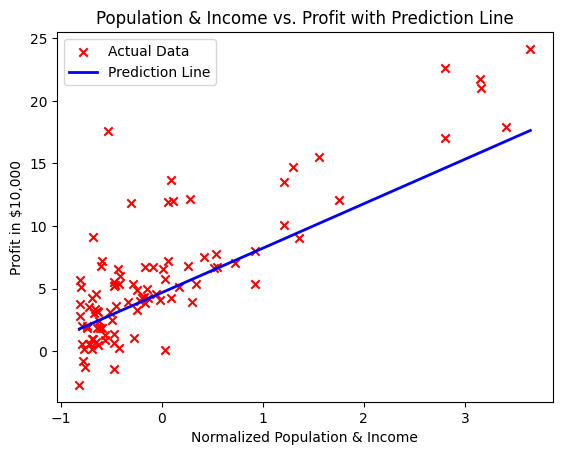

In [190]:

# Extract Feature 1 (Population) and Feature 3 (Average Income)
x_feature1 = x_train_norm[:, 0]  # Population
x_feature3 = x_train_norm[:, 2]  # Average Income

# Generate a range of values for both features
x_min1, x_max1 = x_feature1.min(), x_feature1.max()
x_min3, x_max3 = x_feature3.min(), x_feature3.max()

x_line1 = np.linspace(x_min1, x_max1, 100)
x_line3 = np.linspace(x_min3, x_max3, 100)

# Compute predicted values using trained weights
y_pred = w_final[0] * x_line1 + w_final[2] * x_line3 + b_final

# Scatter plot of actual data
plt.scatter(x_feature1, y_train, marker='x', c='r', label="Actual Data")

# Plot the prediction line
plt.plot(x_line1, y_pred, color='blue', linewidth=2, label="Prediction Line")

plt.xlabel("Normalized Population & Income")
plt.ylabel("Profit in $10,000")
plt.title("Population & Income vs. Profit with Prediction Line")
plt.legend()
plt.show()
